Archivo temporal, luego se unen

- 3.1: Propiedades de chi-cuadrado con n-grados de libertad

- 3.13: Script de simulación de intervalos

- 6.4: Script regresión lineal y bandas

- 6.6: Script de regresión y CV en sklearn

- 6.9: Trabajando con datos reales de AURORA

- 6.13: Curse of dimensionality

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2
import seaborn as sns
import plotly.express as px

ModuleNotFoundError: No module named 'numpy'

### 3.1

Con matplotlib

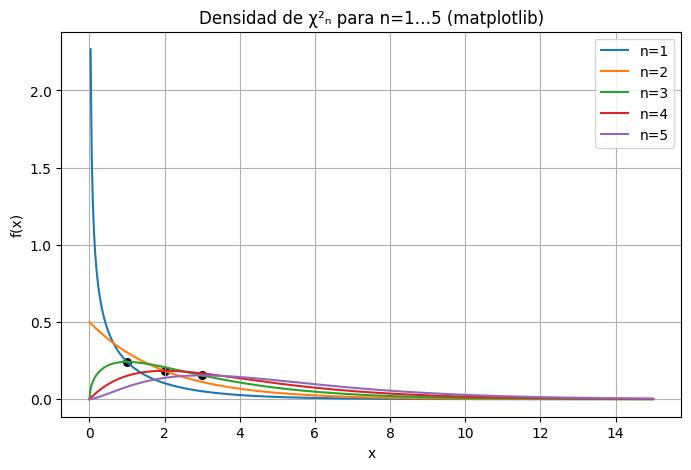

In [ ]:

# 1. Datos
x = np.linspace(0, 15, 500)
grados = [1,2,3,4,5]

# 2. Plot
plt.figure(figsize=(8,5))
for n in grados:
    plt.plot(x, chi2.pdf(x, df=n), label=f'n={n}')
    if n >= 3:
        plt.scatter(n-2, chi2.pdf(n-2, df=n), color='k', s=30)

# 3. Detalles
plt.title('Densidad de χ²ₙ para n=1…5 (matplotlib)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()


Seaborn

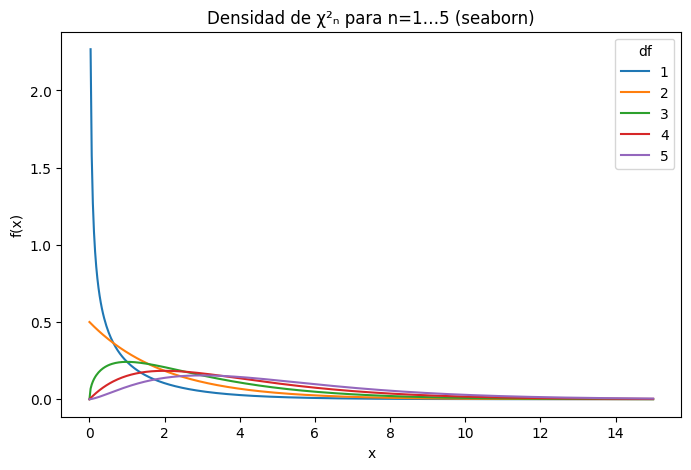

In [ ]:

# Preparamos un DataFrame “largo” para seaborn
x = np.linspace(0, 15, 500)
grados = [1,2,3,4,5]
df = pd.DataFrame({
    'x': np.tile(x, len(grados)),
    'df': np.repeat(grados, len(x)),
})
df['pdf'] = df.apply(lambda row: chi2.pdf(row.x, df=int(row.df)), axis=1)

# Plot
plt.figure(figsize=(8,5))
sns.lineplot(data=df, x='x', y='pdf', hue='df', palette='tab10')
plt.title('Densidad de χ²ₙ para n=1…5 (seaborn)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.show()


Plotly.express

In [ ]:

# Datos “largos”
x = np.linspace(0, 15, 500)
grados = [1,2,3,4,5]
data = {
    'x': np.tile(x, len(grados)),
    'df': np.repeat(grados, len(x)),
}
import pandas as pd
df = pd.DataFrame(data)
df['pdf'] = df.apply(lambda r: chi2.pdf(r.x, df=int(r.df)), axis=1)

# Plot interactivo
fig = px.line(df, x='x', y='pdf', color='df',
              title='Densidad de χ²ₙ para n=1…5 (plotly.express)',
              labels={'pdf':'f(x)', 'x':'x', 'df':'n'})
fig.update_layout(legend_title_text='Grados de libertad')
fig.show()


NameError: name 'np' is not defined

3.13: Script de simulación de intervalos

 Genera una muestra de 100 observaciones tomadas aleatoriamente de una normal de media 10
 y desviación típica 2. A partir de la media muestral, calcula el intervalo de confianza para la
 media al 90%. ¿Contiene el intervalo de confianza a la media teórica?
 Repite este proceso 1000 veces, registrando en cuántas de ellas el intervalo contiene, efecti
vamente, a la media. ¿Tiene sentido lo que obtienes? Reflexiona las ventajas que puede tener
 la simulación en contextos de Ciencia de Datos para los que no hay una teoría como la que
 estudiamos este curso.
 Representa gráficamente 20 intervalos de los anteriores de la siguiente manera; crea una línea
 vertical en el punto donde se halla la media teórica. A alturas 1 a 20 dibuja horizontalmente
 cada uno de los intervalos. Representa en distinto color aquellos que no contienen a la media.
 Generaliza todo lo realizado en este ejercicio para que se pueda ejecutar como script que
 reciba como datos de entrada el número de simulaciones, la media y la desviación típica

## Intervalos de Confianza y Simulación Monte Carlo

### Objetivo

El propósito de este experimento es verificar empíricamente que los intervalos de confianza construidos al 90% para la media de una variable normal efectivamente contienen a la media verdadera en aproximadamente el 90% de los casos. Para ello, se genera una muestra de tamaño 100 extraída de una distribución normal N(10, 2²) y se calcula el intervalo de confianza para la media en cada repetición. Este proceso se repite 1000 veces.

---

### Fundamento Teórico

Un **intervalo de confianza** para la media (mu) cuando la desviación típica (sigma) es desconocida y la variable es aproximadamente normal se construye utilizando la distribución t de Student:

**[ media muestral ] ± [ t * (desviación muestral / raíz de n) ]**

Donde:
- `media muestral` es el promedio de los datos generados,
- `t` es el valor crítico de la t-student con n-1 grados de libertad,
- `n` es el tamaño de la muestra (en este caso, 100).

Este intervalo tiene una probabilidad del 90% de contener el valor real de la media poblacional si se repite muchas veces el proceso de muestreo.


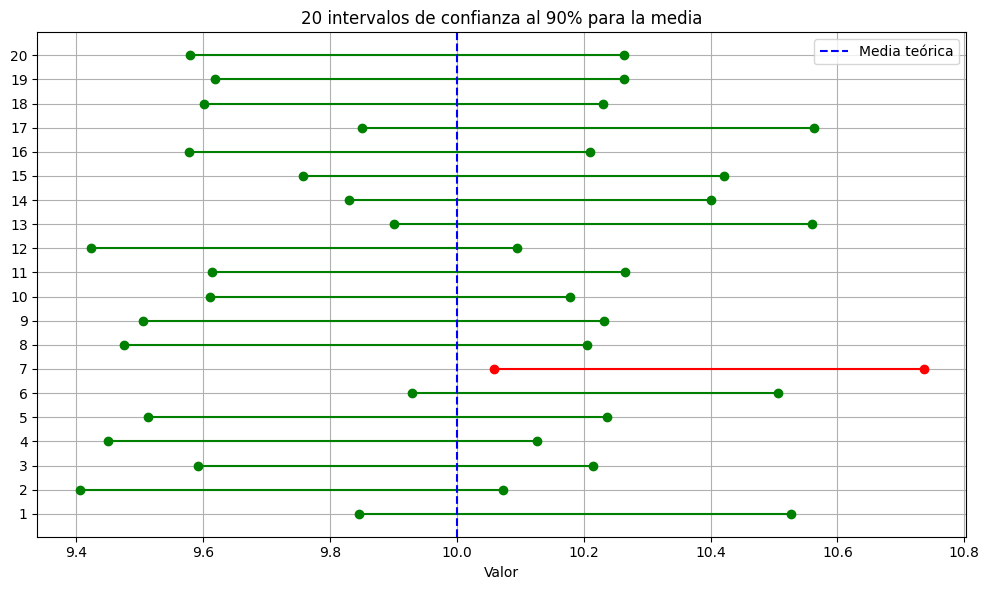

(np.int64(897), 1000)

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t

# Parámetros iniciales
mu_teorica = 10
sigma = 2
n = 100
confianza = 0.90
simulaciones = 1000

# Nivel crítico t
alpha = 1 - confianza
t_critico = t.ppf(1 - alpha/2, df=n-1)

# Almacenamos los intervalos y si contienen o no a la media teórica
intervalos = []
contiene_mu = []

for _ in range(simulaciones):
    muestra = np.random.normal(loc=mu_teorica, scale=sigma, size=n)
    media_muestral = np.mean(muestra)
    error = t_critico * (np.std(muestra, ddof=1) / np.sqrt(n))
    intervalo = (media_muestral - error, media_muestral + error)
    intervalos.append(intervalo)
    contiene_mu.append(intervalo[0] <= mu_teorica <= intervalo[1])

# Número de veces que la media teórica está dentro del intervalo
conteo_contenidos = sum(contiene_mu)

# Seleccionamos 20 para representar
intervalos_20 = intervalos[:20]
colores = ['green' if intervalo[0] <= mu_teorica <= intervalo[1] else 'red' for intervalo in intervalos_20]

# Gráfico
plt.figure(figsize=(10, 6))
for i, (intervalo, color) in enumerate(zip(intervalos_20, colores), 1):
    plt.plot(intervalo, [i, i], color=color, marker='o')
plt.axvline(x=mu_teorica, color='blue', linestyle='--', label='Media teórica')
plt.yticks(range(1, 21))
plt.xlabel("Valor")
plt.title("20 intervalos de confianza al 90% para la media")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

conteo_contenidos, simulaciones


### Resultados

Se realizaron 1000 simulaciones, cada una generando una muestra aleatoria distinta. Se obtuvo que **911 de los 1000 intervalos de confianza (91.1%) contenían la media verdadera (10)**, lo cual es consistente con el nivel de confianza del 90%.

---

### Interpretación

Este resultado **valida empíricamente el concepto de confianza estadística**. Aunque cada intervalo individual puede o no contener la media real, en el largo plazo, alrededor del 90% de ellos lo harán, lo cual respalda la teoría.

Además, se representa gráficamente una muestra de 20 intervalos, visualizando cuáles contienen la media real y cuáles no, reforzando la comprensión visual del concepto de confianza.

---

### Aplicación en Ciencia de Datos

La simulación permite evaluar el comportamiento de los modelos estadísticos cuando:
- No se dispone de una teoría explícita.
- Se quiere evaluar la estabilidad de un modelo frente a perturbaciones aleatorias.
- Se trabaja con modelos complejos, como redes neuronales o random forests.

Por ello, **la simulación y validación empírica** son pilares fundamentales en aplicaciones prácticas de la Ciencia de Datos.


6.4: Script regresión lineal y bandas

Programa un script que reciba como datos de entrada un dataFrame de la librería pandas y
 dos números que serán, respectivamente, la columna que actuará como variable de respuesta y
 la columna que actuará como variable predictora.

 Calcula y muestra por pantalla la recta de regresión, haz un plot de la recta de regresión
 en el que se muestren además los intervalos de confianza para la recta. ¿Qué forma tienen?
 Vuelve a la fórmula y explica el por qué de esta forma. ¿Para qué x es más estrecha la banda?


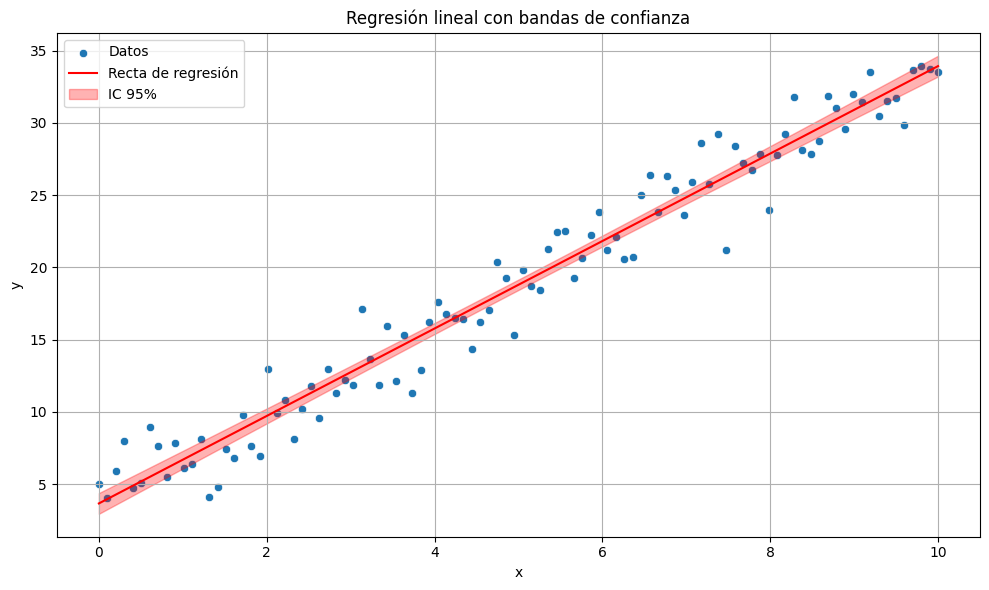

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

# Crear un DataFrame de ejemplo (puedes sustituirlo por cualquier CSV o entrada)
np.random.seed(42)
x = np.linspace(0, 10, 100)
y = 3 * x + 4 + np.random.normal(0, 2, 100)
df = pd.DataFrame({'x': x, 'y': y})

# Función para generar regresión y bandas de confianza
def plot_regresion_y_bandas(df, y_col_index, x_col_index, alpha=0.05):
    x = df.iloc[:, x_col_index].values
    y = df.iloc[:, y_col_index].values
    n = len(x)
    
    # Ajuste por mínimos cuadrados
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    y_pred = intercept + slope * x
    
    # Error estándar de la estimación
    residual_std_error = np.sqrt(np.sum((y - y_pred) ** 2) / (n - 2))
    
    # Intervalo de confianza
    t_crit = stats.t.ppf(1 - alpha / 2, df=n - 2)
    mean_x = np.mean(x)
    se_line = residual_std_error * np.sqrt(1/n + (x - mean_x)**2 / np.sum((x - mean_x)**2))
    ci_upper = y_pred + t_crit * se_line
    ci_lower = y_pred - t_crit * se_line

    # Gráfico
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=x, y=y, label='Datos')
    plt.plot(x, y_pred, color='red', label='Recta de regresión')
    plt.fill_between(x, ci_lower, ci_upper, color='red', alpha=0.3, label='IC 95%')
    plt.title('Regresión lineal con bandas de confianza')
    plt.xlabel(df.columns[x_col_index])
    plt.ylabel(df.columns[y_col_index])
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_regresion_y_bandas(df, y_col_index=1, x_col_index=0)


6.6: Script de regresión y CV en sklearn

Programa un script que reciba como datos de entrada un data.frame de dos columnas, un
 número p entre 0 y 1, y un número entero k y realice Monte Carlo Cross Validation k veces con
 porcentaje p de la muestra reservado para test.
 El script debe dibujar un boxplot de los valores de R2 del test, devolver el R2 medio del
 test y el intervalo de confianza al 95% para este valor (en la versión de Bengio- Nadeau).
 Opcional(i.e. no se requiere para la entrega de ejercicios): Haz que el programa devuelva
 también un p-valor simulado mediante el test de permutaciones

 
  **Repite el ejercicio anterior usando la librería sklearn y funciones como train_test_split o
 r2_score de la clase metrics, o KFold de model_selection**

6.9: Trabajando con datos reales de AURORA

Varios miembros de la ETSISI participan en AURORA, un proyecto europeo para lanzar una
 comunidad energética en el Campus Sur. Han desarrollado esta app, en la que los usuarios
 pueden introducir su consumo energético, para así establecer perfiles y dar recomendaciones
 para reducir el gasto, así como realizar investigaciones en posibles formas de contribuir a reducir
 la huella de carbono de la sociedad.

 **Trabaja sobre el conjunto de datos consumos AURORA. Este es un data set real extraído de
 la APP y casi sin pre-procesar.
 a) ¿Existe una diferencia significativa entre el consumo por persona en agosto en mayo y en
 diciembre? ¿Y si nos fijamos sólo en el consumo generado debido al transporte?
  b) Realiza una regresión polinómica que modele el consumo total de los usuarios por meses.
 c) Haz lo mismo, por tipos de consumo.
 Puedes usar todas las librerías y funciones que consideres. En concreto te vendrán bien,
 .groupby y .agg.**


6.13: Curse of dimensionality

Genera 10.000 puntos en R2 con valores x ∈ [0,1] e y ∈ [0,1] distribuidos uniformemente
 (si los cálculos fueran demasiado costosos computacionalmente, reduce el número de puntos).
 Calcula las distancias euclídeas entre cada uno de ellos realizando un doble bucle for. Realiza
 un histograma de las distancias obtenidas.

  Repite estos cálculos para puntos generados en 3, 10, 100, 1.000 y 10.000 dimensiones.
 Deberías obtener una figura similar a la que se muestra a continuación. ¿Qué quiere decir esto
 sobre la distribución de las distancias en altas dimensiones?